In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

# Задание 2.1
Методом простой итерации найти вещественные корни алгебраического уравнения $ P(x) = 0 $ с точностью $ \varepsilon = 10^{-8} $.

$ P(x) = - {3.3}{x^3} - {11.6}{x^2} + {8.75}{x} + 15.4 $

Рассчитаем производную данной функции:

$ P'(x) = - {9.9}{x^2} - {23.2}{x} + {8.75} $


In [8]:
#Функция
def P(x):
    return -3.3*(x**3) - 11.6*(x**2) + 8.75*x + 15.4

#Производная функции
def dP(x):
    return -9.9*(x**2) - 23.2*x + 8.75

#Точность
eps = 10**(-8)

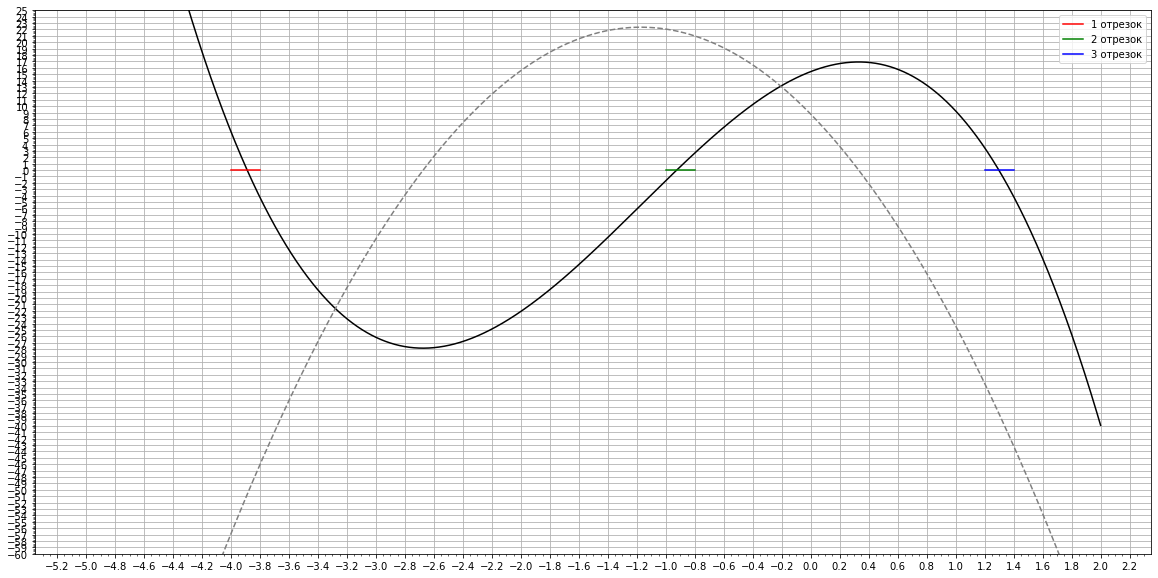

In [9]:
fig, axs = plt.subplots(1, 1, figsize = (20, 10))

#Интервал 
x_i = np.linspace(-5, 2, 5000)

#График функции
axs.plot(x_i, P(x_i), color = 'black')

#График производной
axs.plot(x_i, dP(x_i), color = 'gray', ls = 'dashed')

#Добавим для наглядности сетку
axs.xaxis.set_major_locator(tkr.MultipleLocator(0.2))
axs.yaxis.set_major_locator(tkr.MultipleLocator(1))
axs.minorticks_on()
axs.grid(True)

#Ограничим ось OY для удобного поиска значений производной
axs.set_ylim([-60,25])

#На основе графика выделим 3 отрезка локализации
axs.plot([-4.0, -3.8], [0, 0], color = 'red', label = "1 отрезок")
axs.plot([-1.0, -0.8], [0, 0], color = 'green', label = "2 отрезок")
axs.plot([1.2, 1.4], [0, 0], color = 'blue', label = "3 отрезок")
axs.legend()

In [10]:
#Значения максимумов и минимумов производных на каждом отрезке локализации (примерно)
MP = [-46, 22, -34]
mP = [-56, 21, -43]

#Создаем 2 массива из 3 элементов для вычисления значений итерационного параметра a и параметра q
a = [0, 0, 0]
q = [0, 0, 0]

#И заполняем их
for i in range(3):
    a[i] = (2/(MP[i] + mP[i]))
    q[i] = abs((MP[i] - mP[i])/(MP[i] + mP[i]))
    
#Выведем полученные значения
print("A:", a)
print("Q:", q)

A: [-0.0196078431372549, 0.046511627906976744, -0.025974025974025976]
Q: [0.09803921568627451, 0.023255813953488372, 0.11688311688311688]


In [11]:
#Зададим x0 для каждого корня - это будет середина отрезка локализации
x = [-3.9, -0.9, 1.3]

#Сохраним количество итераций
it = [0, 0, 0]

#Функция для расчета корня с заданной точностью
def iteration(x, a, q, eps):
    it = 1
    buf = x - a * P(x)
    while abs(buf - x) > ((1-q)/q) * eps :
        x = buf
        buf = x - a * P(x)
        it += 1
    return (it, buf)
                         
#Расчет корней
for i in range (3):
    it[i], x[i] = iteration(x[i], a[i], q[i], eps)
                         
#Выведем полученные значения
print("it:", it)
print("x:", x)

it: [3, 4, 4]
x: [-3.8884062903933896, -0.924668574531373, 1.2979233503252532]


# Задание 2.2
Дано уравнение $ f(x) = 0 $. Найти все корни уравнения с заданной точностью $ \varepsilon = 10^{-12} $ на указанном отрезке [a, b]. Для решения задачи использовать метод Ньютона и упрощенный метод Ньютона (вариант 25). Сравнить количество итераций, потребовавшихся для достижения заданной точности каждым методом.

$ f(x) = sin{x} - \sqrt{x}cos{4x} - 1 $

Отрезок: $ [5, 10] $

Рассчитаем производную данной функции:

$ f'(x) = cos{x} - \frac{cos{4x}}{2\sqrt{x}} + 4\sqrt{x}sin{4x} $

In [12]:
#Зададим функции
def f(x):
    return np.sin(x) - np.sqrt(x) * np.cos(4*x) - 1

def df(x):
    return np.cos(x) - np.cos(4*x)/(2*np.sqrt(x)) + 4*np.sqrt(x)*np.sin(4*x)

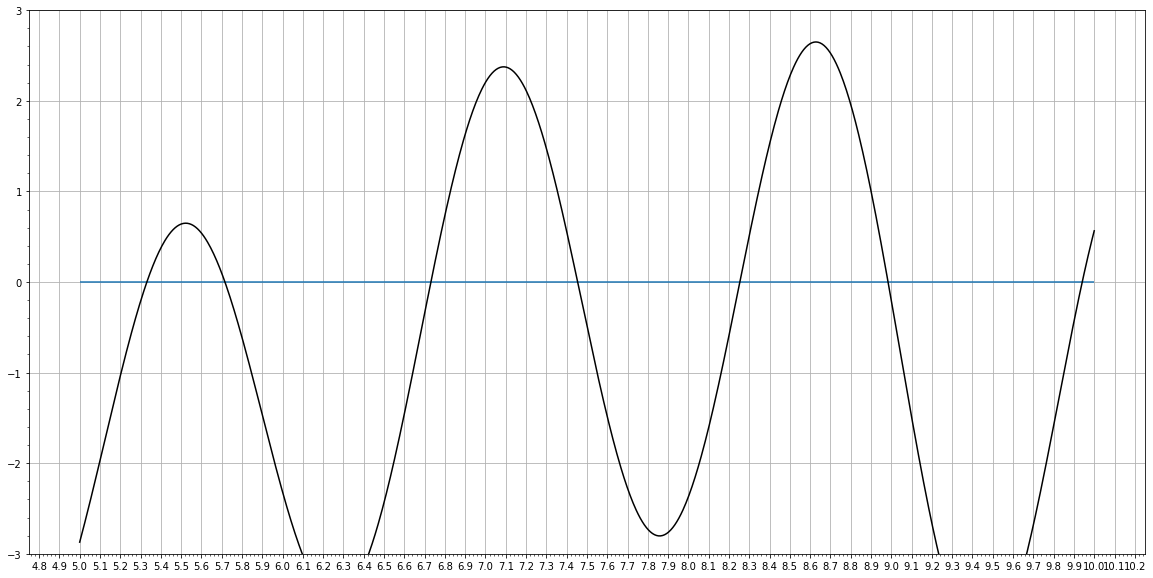

In [13]:
#Интервал
x_int = np.linspace(5, 10, 1000)
fig, axs = plt.subplots(1, 1, figsize = (20, 10))

#График функции
axs.plot(x_int, f(x_int), color = 'black')
axs.set_ylim([-3, 3])
axs.xaxis.set_major_locator(tkr.MultipleLocator(0.1))
axs.minorticks_on()
axs.grid(True)
axs.hlines(0, x_int.min(), x_int.max(),  ls = '-')

#По графику выделим 7 отрезков локализации
local = np.array([[5.3, 5.4],[5.7, 5.8],[6.7, 6.8],[7.4, 7.5],[8.2, 8.3],[8.9, 9.0],[9.9, 10.0]])

In [14]:
#Метод Ньютона
def newtone(local, eps):
    x = (local[0] + local[1])/2
    buf = x - f(x)/df(x)
    it = 1
    while (abs(x - buf) > eps):
        x = buf
        buf = x - f(x)/df(x)
        it += 1
    return (it, buf)

#Упрощенный метод Ньютона
def easy_newtone(local, eps):
    x = (local[0] + local[1])/2
    dfx0 = df(x);
    buf = x - f(x)/dfx0
    it = 1
    while (abs(x - buf) > eps):
        x = buf
        buf = x - f(x)/dfx0
        it += 1
    return (it, buf)

for i in range(7):
    print("Newtone:", newtone(local[i], 10**(-12)))
    print("Easy_Newtone:", easy_newtone(local[i], 10**(-12)))

Newtone: (5, 5.331130152833764)
Easy_Newtone: (11, 5.331130152833736)
Newtone: (5, 5.715871507538871)
Easy_Newtone: (12, 5.715871507538932)
Newtone: (4, 6.730968726608093)
Easy_Newtone: (7, 6.730968726608089)
Newtone: (4, 7.454055907957923)
Easy_Newtone: (5, 7.454055907957923)
Newtone: (3, 8.253535759884443)
Easy_Newtone: (4, 8.253535759884443)
Newtone: (4, 8.983962817127864)
Easy_Newtone: (9, 8.983962817127868)
Newtone: (4, 9.940842332589444)
Easy_Newtone: (7, 9.940842332589435)


In [15]:
#Модифицированный метод Ньютона
def Mnewtone(local, eps):
    r = []
    x = (local[0] + local[1])/2
    r.append(abs(f(x)))
    buf = x - f(x)/df(x)
    it = 1
    while (abs(x - buf) > eps) and (it <= 10) :
        x = buf
        r.append(abs(f(x)))
        buf = x - f(x)/df(x)
        it += 1
    return (r, buf, it)

#Модифицированный упрощенный метод Ньютона
def Measy_newtone(local, eps):
    r = []
    x = (local[0] + local[1])/2
    dfx0 = df(x);
    r.append(abs(f(x)))
    buf = x - f(x)/dfx0
    it = 1
    while (abs(x - buf) > eps) and (it <= 10) :
        x = buf
        r.append(abs(f(x)))
        buf = x - f(x)/dfx0
        it += 1
    return (r, buf, it)

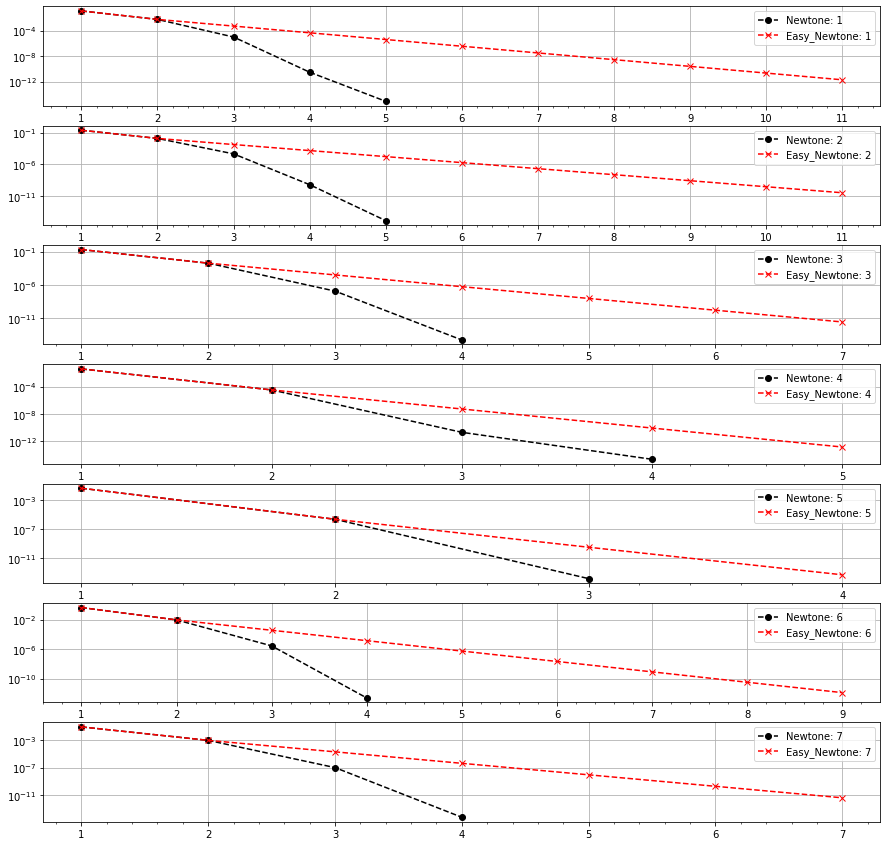

In [16]:
fig, axs = plt.subplots(7, figsize = (15, 15))

#График функции в логарифмической шкале
for i in range(7):
    axs[i].plot(np.arange(Mnewtone(local[i],  10**(-12))[2]) + 1, 
                               Mnewtone(local[i],  10**(-12))[0],'--ro', color = 'black', label = f'Newtone: {i+1}')
    axs[i].plot(np.arange(Measy_newtone(local[i],  10**(-12))[2]) + 1, 
                               Measy_newtone(local[i],  10**(-12))[0],'--bx', color = 'red', label = f'Easy_Newtone: {i+1}')
    axs[i].xaxis.set_major_locator(tkr.MultipleLocator(1))
    axs[i].minorticks_on()
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_yscale('log')


# Задание 2.3
Найти корни уравнения и определить их кратность.

$ f(x) = \sqrt{3}ctg{x} + 4\sqrt{3}x + 4\pi x - 3 - \frac{2\pi}{\sqrt{3}} - 12x^2 - \frac{\pi^2}{3} $

$ f'(x) = - \frac{\sqrt{3}}{sin^2{x}} + 4\sqrt{3} + 4\pi - 24x $

$ f''(x) = \frac{2\sqrt{3}cos{x}}{sin^3{x}} - 24 $

$ f'''(x) = - \frac{2\sqrt{3}}{sin^2{x}} - \frac{6\sqrt{3}cos^2{x}}{sin^4{x}} $

In [17]:
def F1(x):
    return np.sqrt(3)/np.tan(x) + 4*np.sqrt(3)*x + 4*math.pi*x - 3 - 2*math.pi/np.sqrt(3) - 12*x**2 - math.pi**2/3

def dF1(x):
    return -np.sqrt(3)/(np.sin(x)**2) + 4*np.sqrt(3) + 4*math.pi - 24*x

def ddF1(x):
    return 2*np.sqrt(3)*np.cos(x) / (np.sin(x)**3) - 24

def dddF1(x):
    return -2*np.sqrt(3)/(np.sin(x)**2) - 6*np.sqrt(3)*(np.cos(x)**2)/(np.sin(x)**4)

<ipython-input-17-88bad5969cfe>:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(3)/np.tan(x) + 4*np.sqrt(3)*x + 4*math.pi*x - 3 - 2*math.pi/np.sqrt(3) - 12*x**2 - math.pi**2/3
<ipython-input-17-88bad5969cfe>:5: RuntimeWarning: divide by zero encountered in true_divide
  return -np.sqrt(3)/(np.sin(x)**2) + 4*np.sqrt(3) + 4*math.pi - 24*x
<ipython-input-17-88bad5969cfe>:8: RuntimeWarning: divide by zero encountered in true_divide
  return 2*np.sqrt(3)*np.cos(x) / (np.sin(x)**3) - 24
<ipython-input-17-88bad5969cfe>:11: RuntimeWarning: divide by zero encountered in true_divide
  return -2*np.sqrt(3)/(np.sin(x)**2) - 6*np.sqrt(3)*(np.cos(x)**2)/(np.sin(x)**4)


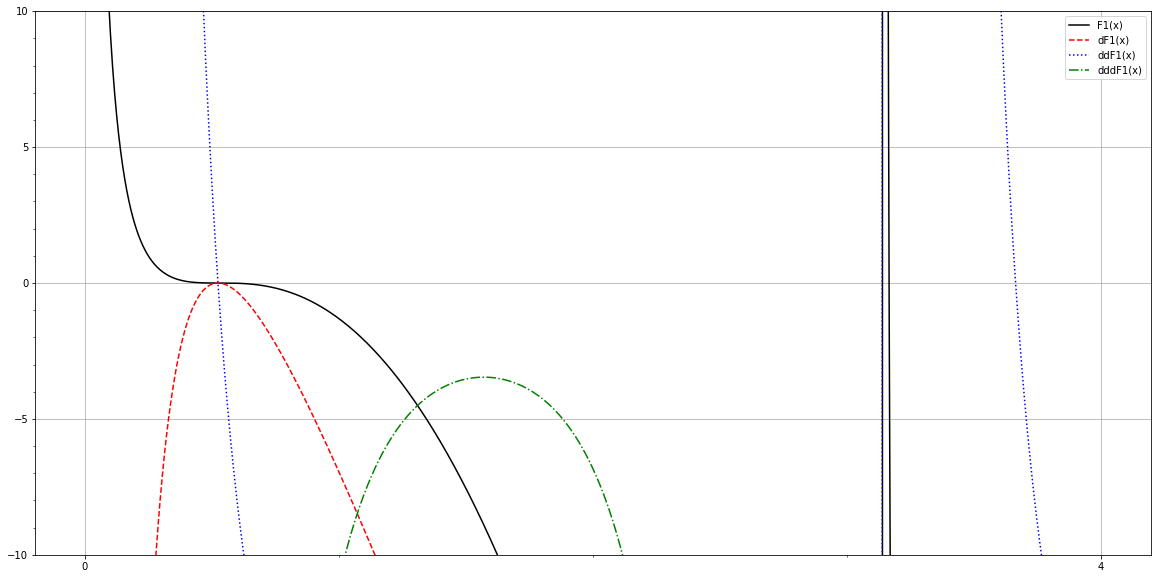

In [18]:
#Интервал
x_interv = np.linspace(0, 4, 1000)

fig, axs = plt.subplots(1, 1, figsize = (20, 10))

#Графики
axs.plot(x_interv, F1(x_interv), color = 'black', label = 'F1(x)')
axs.plot(x_interv, dF1(x_interv), color = 'red', ls = 'dashed', label = 'dF1(x)')
axs.plot(x_interv, ddF1(x_interv), color = 'blue', ls = 'dotted', label = 'ddF1(x)')
axs.plot(x_interv, dddF1(x_interv), color = 'green', ls = 'dashdot', label = 'dddF1(x)')
axs.legend()
axs.set_ylim([-10, 10])

axs.xaxis.set_major_locator(tkr.MultipleLocator(4))
axs.yaxis.set_major_locator(tkr.MultipleLocator(5))
axs.minorticks_on()
axs.grid(True)

#Отрезок локализации
loc = np.array([0.4, 0.6])

In [19]:
#Ньютон
def newtoneK(local, eps, m):
    it = 1
    x = (local[0] + local[1])/2
    buf = x - m * F1(x)/dF1(x)
    while (abs(x - buf) > eps):
        x = buf
        buf = x - m * F1(x)/dF1(x)
        it += 1
    return (it, buf)

print("Newtone:", newtoneK(loc, eps, 1))
print("Newtone:", newtoneK(loc, eps, 2))
print("Newtone:", newtoneK(loc, eps, 3))
print("Newtone:", newtoneK(loc, eps, 4))
print("Newtone:", newtoneK(loc, eps, 5))

Newtone: (56, 0.5235974678729711)
Newtone: (28, 0.5235955012486161)
Newtone: (3, 0.5235986906705336)
Newtone: (88, 0.523595778136837)
Newtone: (58, 0.5235964171779157)


Вывод: так как при $ x_0 = 0.523... $ сама функция и ее первая и вторая производная обращаются в нуль, а третья - нет, то корень $ x_0 $ кратности 3.